**`DUEÑAS CONDORI, ARACELY NICOLL`**

---



## **REGRESIÓN LINEAL DE PM10-HAWAII**

---



### Importando paquetes y el conjunto de datos

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [103]:
# Cargar los CSV
df1 = pd.read_csv("/content/sample_data/california_housing_test.csv")
df2 = pd.read_csv("/content/sample_data/california_housing_train.csv")

df=pd.concat([df1,df2], ignore_index= True)
df.head()  # vemos los 5 primeros datos del dataframe

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

### Consultar información básica sobre el conjunto de datos

**El método 'info()'los tipos y números de datos**

In [104]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [105]:
df.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20000.000000  20000.000000        20000.000000  20000.000000   
mean    -119.566172     35.626750           28.627750   2637.051550   
std        2.003609      2.136141           12.582229   2176.314757   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.250000           29.000000   2126.000000   
75%     -118.000000     37.710000           37.000000   3149.000000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    20000.000000  20000.000000  20000.000000   20000.000000   
mean       537.991800   1425.557650    499.525450       3.872132   
std        420.631119   1131.048487    381.729517       1.900356   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    788.000000    280.000000       2.562500   
50%        434.000000   1166.000000    409.000000       3.536000   
75%        647.000000   1724.000000    604.000000       4.745325   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20000.000000  
mean        207082.716750  
std         115557.055856  
min          14999.000000  
25%         119800.000000  
50%         179800.000000  
75%         265000.000000  
max         500001.000000

**El método 'columns' obtiene los nombres de las columnas (características)**

In [106]:
# Limpia nombres: quita espacios, pasa a minúsculas y reemplaza espacios por "_"
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(r"\s+", "_", regex=True))

# Busca cómo se llama la columna de PM10 (por si viene como 'pm10', 'pm_10', etc.)
[c for c in df.columns if "pm10" in c]


[]

### Visualización básica del conjunto de datos

**Pairplots usando seaborn**

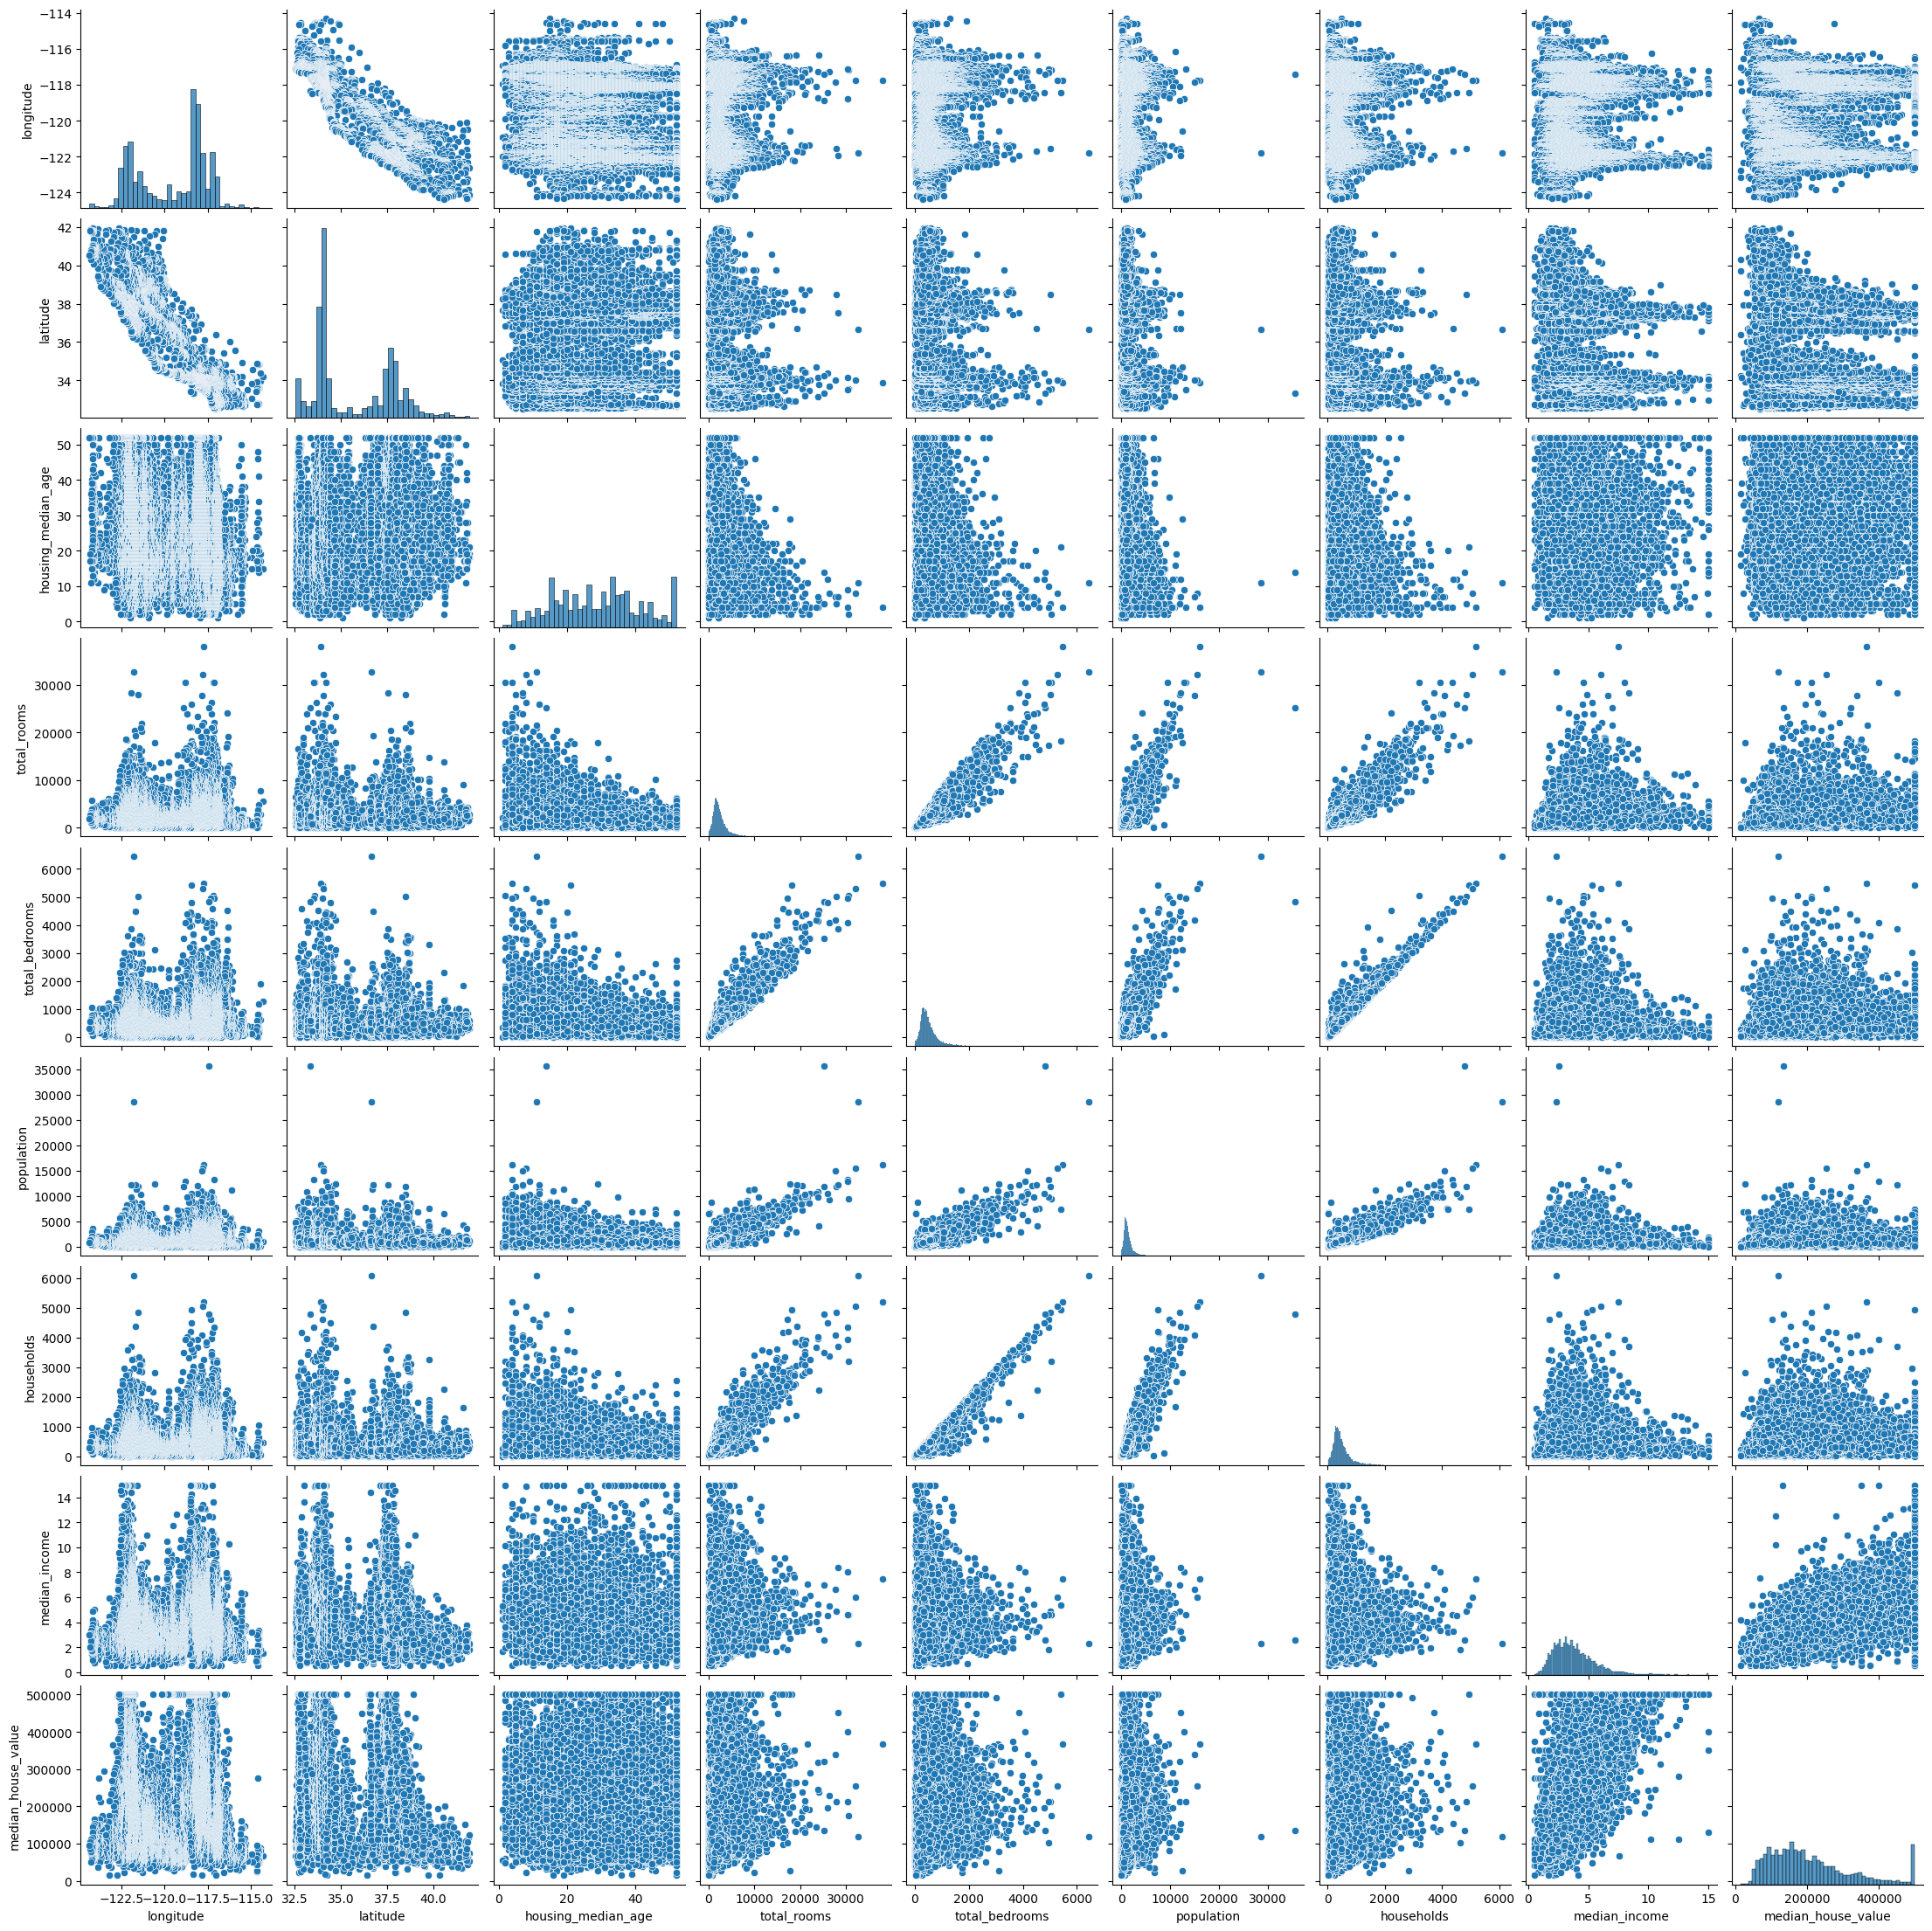

In [107]:
sns.pairplot(df)

**Distribución del precio (la cantidad prevista)**

In [143]:
# df['longitude, latitude,housing_median_age,total_rooms_total_bedrooms_population, households,median_income, median_house_value'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

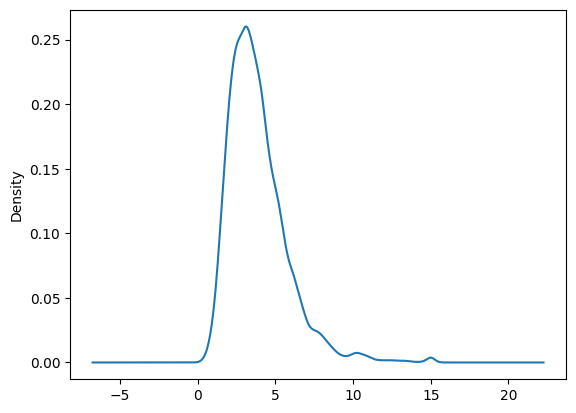

In [144]:
df['median_income'].plot.density()

**Matriz de correlación y heatmap**

In [145]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925176           -0.106824     0.047466   
latitude            -0.925176  1.000000            0.010260    -0.038911   
housing_median_age  -0.106824  0.010260            1.000000    -0.362034   
total_rooms          0.047466 -0.038911           -0.362034     1.000000   
total_bedrooms       0.071700 -0.069217           -0.320873     0.929778   
population           0.102994 -0.112025           -0.296285     0.856826   
households           0.058443 -0.073960           -0.303109     0.918234   
median_income       -0.015882 -0.079157           -0.120161     0.199207   
median_house_value  -0.045788 -0.143969            0.104470     0.135298   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071700    0.102994    0.058443      -0.015882   
latitude                 -0.069217   -0.112025   -0.073960      -0.079157   
housing_median_age       -0.320873   -0.296285   -0.303109      -0.120161   
total_rooms               0.929778    0.856826    0.918234       0.199207   
total_bedrooms            1.000000    0.877377    0.979395      -0.007952   
population                0.877377    1.000000    0.907291       0.003884   
households                0.979395    0.907291    1.000000       0.013535   
median_income            -0.007952    0.003884    0.013535       1.000000   
median_house_value        0.051111   -0.024234    0.066573       0.689109   

                    median_house_value  
longitude                    -0.045788  
latitude                     -0.143969  
housing_median_age            0.104470  
total_rooms                   0.135298  
total_bedrooms                0.051111  
population                   -0.024234  
households                    0.066573  
median_income                 0.689109  
median_house_value            1.000000

<Axes: >

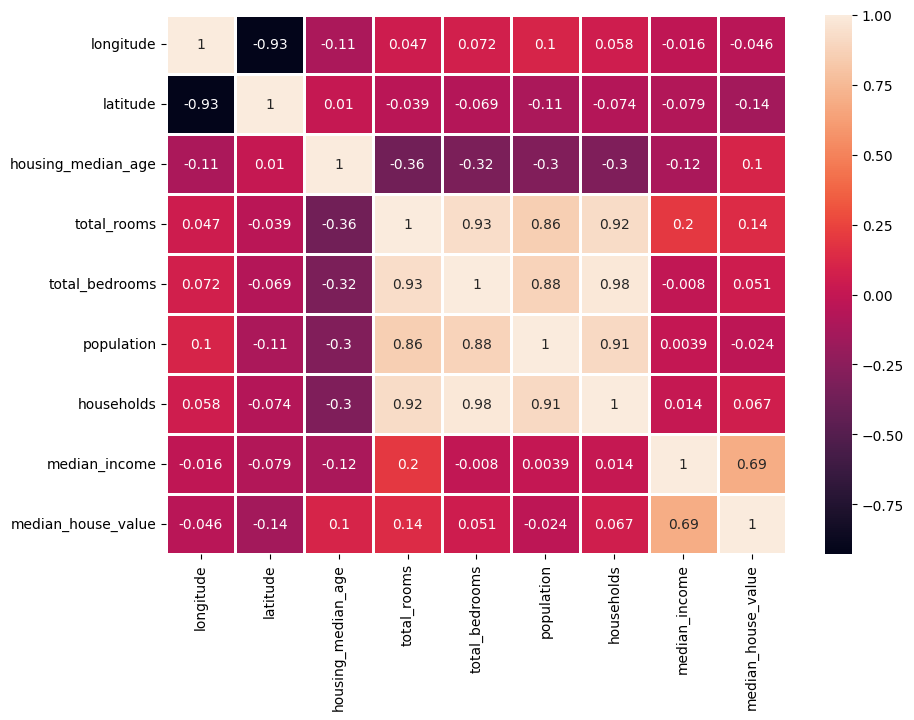

In [146]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

### Conjuntos de características y variables

**Haga una lista de los nombres de las columnas del dataframe**

In [147]:
l_column = list(df.columns) # Haciendo una lista de las columnas
len_feature = len(l_column) # Longitud de la lista de vectores de columna
l_column

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

**Coloque todas las características numéricas en X y el precio en y, ignore la dirección, que es una cadena para la regresión lineal**

In [148]:
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [149]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (20000, 7)
Tamaño de Variable Objetivo: (20000,)


In [150]:
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  
0      1537.0       606.0  
1       809.0       277.0  
2      1484.0       495.0  
3        49.0        11.0  
4       850.0       237.0

In [151]:
y.head()

0    6.6085
1    3.5990
2    5.7934
3    6.1359
4    2.9375
Name: median_income, dtype: float64

### División de entrenamiento-prueba

**Importamos la función train_test_split de scikit-learn**

In [152]:
from sklearn.model_selection import train_test_split

**Creamos los conjuntos de entrenamiento X y de prueba y en un comando usando una proporción de división y una semilla aleatoria**

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Verifique el tamaño y la forma de las divisiones de entrenamiento/prueba (debe estar en la proporción según el parámetro test_size anterior)**

In [154]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (14000, 7)
Tamaño del conjunto de características de prueba: (6000, 7)
Tamaño de la variable objetivo del entrenamiento: (14000,)
Tamaño de la variable objetivo de prueba: (6000,)


### Ajuste y entrenamiento del modelo

**Importamos el estimador de modelo de regresión lineal de scikit-learn e lo instanciamos**

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [156]:
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

**Ajustamos el modelo al propio objeto instanciado**

In [157]:
lm.fit(X_train,y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression()

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [158]:
print("El término de intersección del modelo lineal:", lm.intercept_)

El término de intersección del modelo lineal: -51.475053121060824


In [159]:
print("Los coeficientes del modelo lineal:", lm.coef_)

Los coeficientes del modelo lineal: [-6.80250734e-01 -7.14340542e-01 -1.56522845e-02  1.41919190e-03
 -7.28902102e-03 -6.09190573e-04  1.90676819e-03]


In [160]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

Coefficients
longitude              -0.680251
latitude               -0.714341
housing_median_age     -0.015652
total_rooms             0.001419
total_bedrooms         -0.007289
population             -0.000609
households              0.001907

### Cálculo de errores estándar y estadística t para los coeficientes

In [161]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0] * len(X_train.columns)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

Coefficients  Standard Error  t-statistic
longitude              -0.680251        0.006140  -110.793906
latitude               -0.714341        0.005773  -123.746293
housing_median_age     -0.015652        0.000983   -15.923587
total_rooms             0.001419        0.000006   251.490139
total_bedrooms         -0.007289        0.000029  -249.778501
population             -0.000609        0.000011   -56.655993
households              0.001907        0.000032    59.235214

In [162]:
print("Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Por lo tanto, las características organizadas en orden de importancia para predecir el precio de la vivienda
------------------------------------------------------------------------------------------
total_rooms > 
households > 
housing_median_age > 
population > 
longitude > 
latitude > 
total_bedrooms


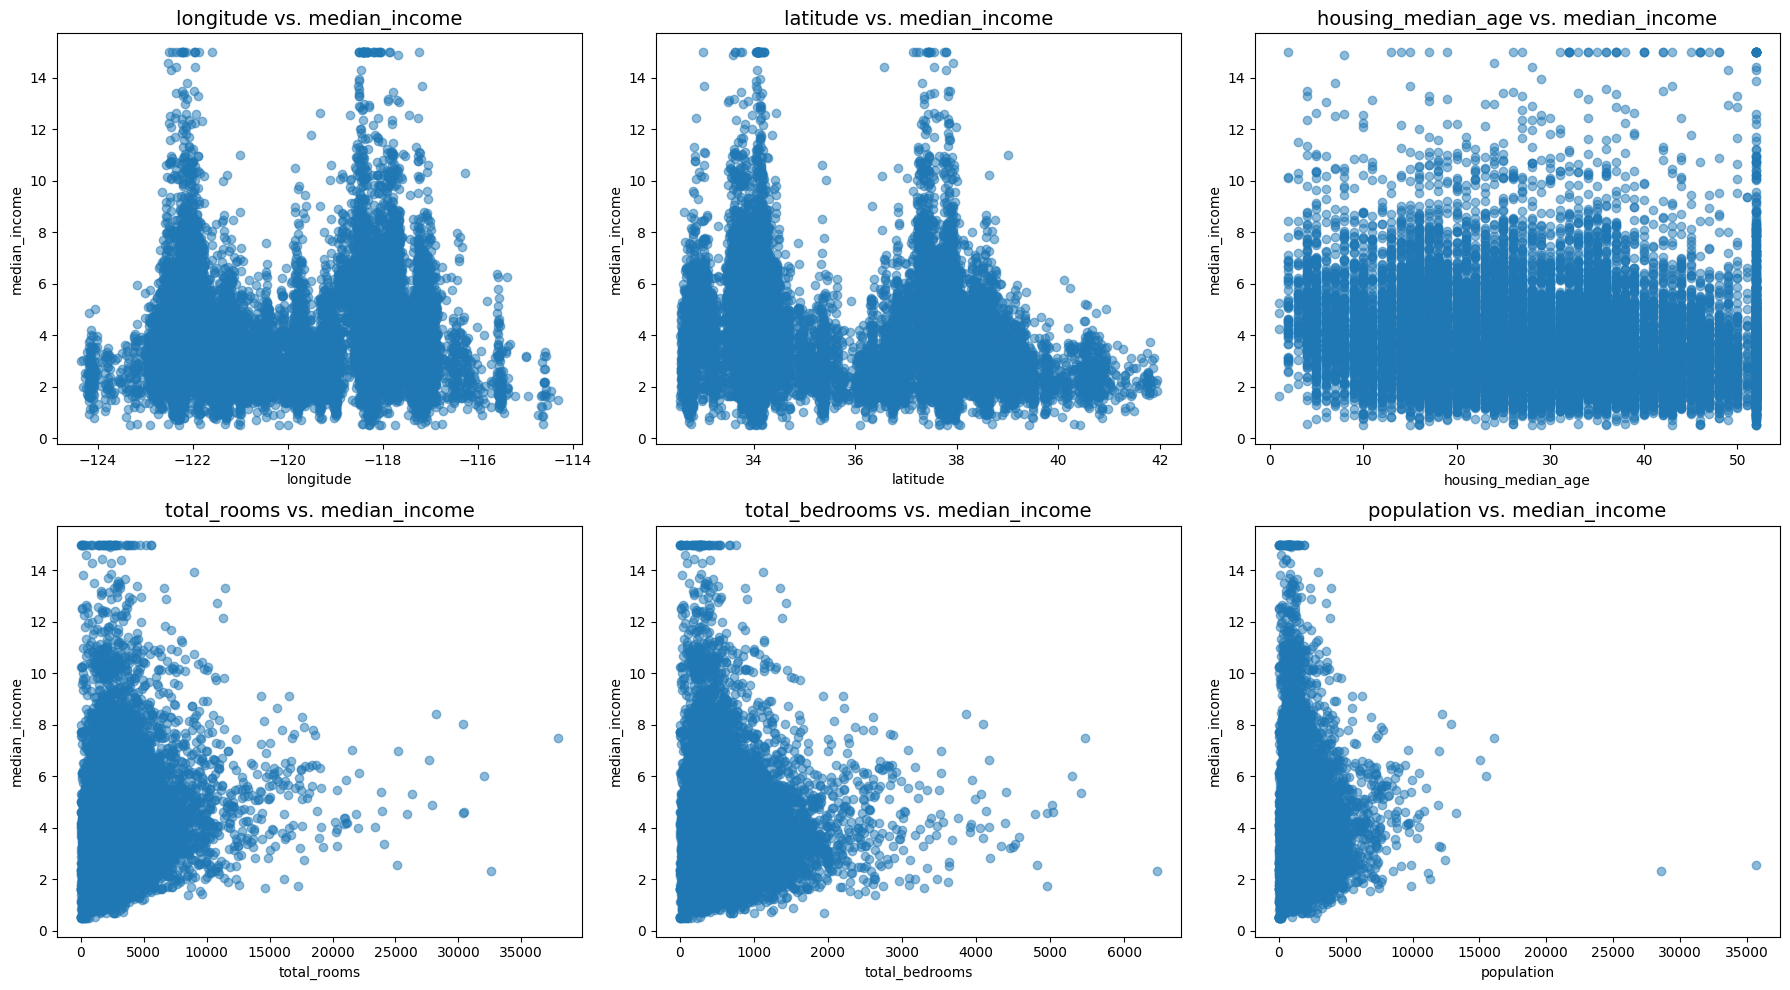

In [165]:
# Lista de columnas (ej: las más importantes del modelo)
l = list(cdf.index)   # asumiendo que cdf tiene tus coeficientes / features ordenadas

# Cuántas variables quieres graficar (ej: 6 primeras)
n = 6
cols_to_plot = l[:n]

# Definir el grid: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # para iterar fácilmente

# Hacer scatter plot para cada columna contra "Billing Amount"
for i, col in enumerate(cols_to_plot):
    axes[i].scatter(df[col], df["median_income"], alpha=0.5)
    axes[i].set_title(f"{col} vs. median_income", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("median_income")

plt.tight_layout()
plt.show()

**R cuadrado del ajuste del modelo**

In [129]:
print("Valor del R cuadrado de este ajuste:",round(metrics.r2_score(y_train,train_pred),3))

Valor del R cuadrado de este ajuste: 0.423


### Matrices de evaluación de predicción, estimación de error y regresión

**Predicción usando el modelo lm**

In [130]:
predictions = lm.predict(X_test)
print ("Tipo del objeto predicho :", type(predictions))
print ("Tamaño del objeto predicho:", predictions.shape)

Tipo del objeto predicho : <class 'numpy.ndarray'>
Tamaño del objeto predicho: (6000,)


**Diagrama de dispersión (Scatterplot) del precio previsto y el conjunto de prueba y para ver si los datos caen en una línea recta de 45 grados**

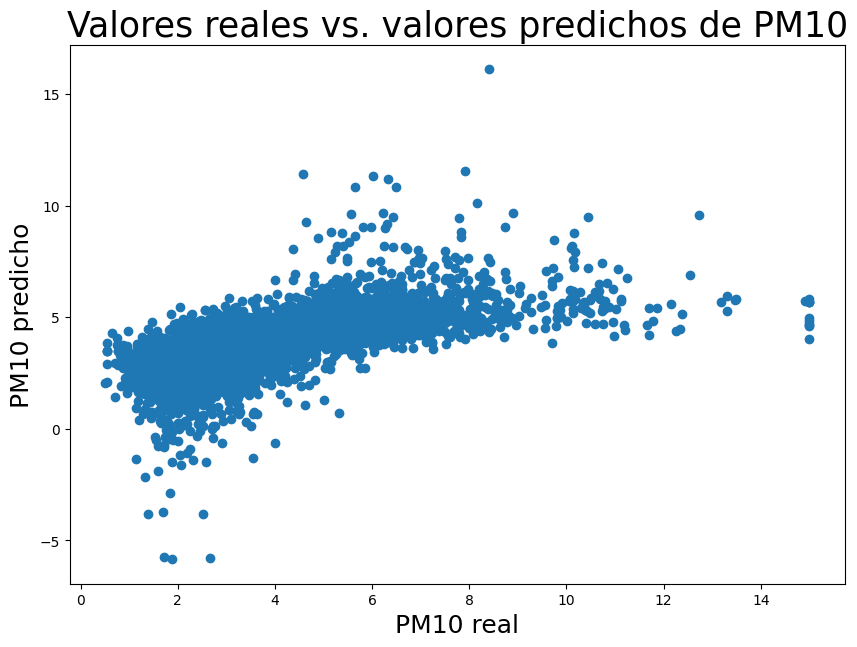

In [168]:
plt.figure(figsize=(10,7))
plt.title("Valores reales vs. valores predichos de PM10",fontsize=25)
plt.xlabel("PM10 real",fontsize=18)
plt.ylabel("PM10 predicho", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Visualizamos el histograma de los residuos, es decir, errores predichos (se espera un patrón distribuido normalmente)**

/tmp/ipython-input-1939217874.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histograma de residuos para verificar la normalidad '}, xlabel='Residuos', ylabel='Densidad del kernel'>

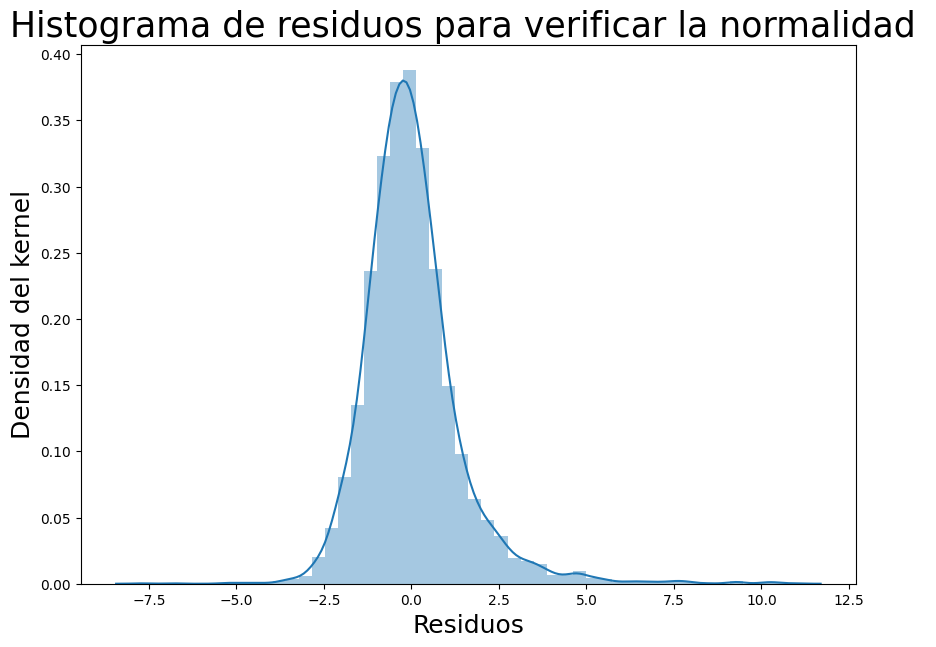

In [169]:
plt.figure(figsize=(10,7))
plt.title("Histograma de residuos para verificar la normalidad ",fontsize=25)
plt.xlabel("Residuos",fontsize=18)
plt.ylabel("Densidad del kernel", fontsize=18)
sns.distplot([y_test-predictions])

**Diagrama de dispersión de residuos y valores predichos (Homoscedasticidad)**


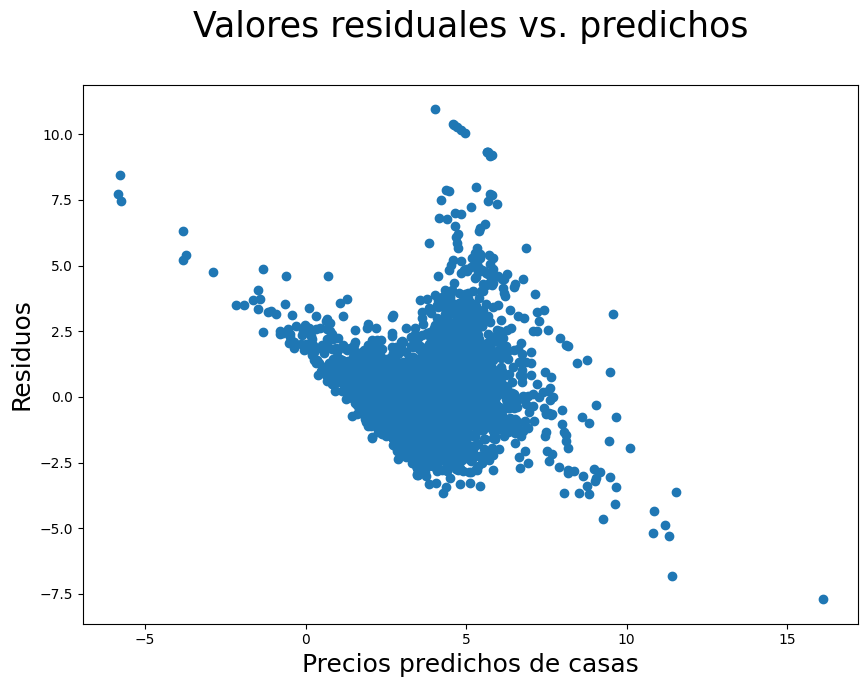

In [133]:
plt.figure(figsize=(10,7))
plt.title("Valores residuales vs. predichos\n",fontsize=25)
plt.xlabel("Precios predichos de casas",fontsize=18)
plt.ylabel("Residuos", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

**Métricas de evaluación de la regresión**

In [167]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 0.9726526415110366
Mean square error (MSE): 1.9626093585189779
Root mean square error (RMSE): 1.4009316037976223


**Valor R cuadrado**

In [166]:
print("Valor R-squared de las predicciones:",round(metrics.r2_score(y_test,predictions),3))

Valor R-squared de las predicciones: 0.432


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
